In [1]:
import scanpy as sc
import numpy as np
import random
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)

age = "P38"
rearing = "NR"

adata = {"Glut" : [], "GABA" : [], "Non" : []}

adata["Glut"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_glut.h5ad".format(age, rearing))
adata["GABA"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_gaba.h5ad".format(age, rearing))
adata["Non"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_non.h5ad".format(age, rearing))

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


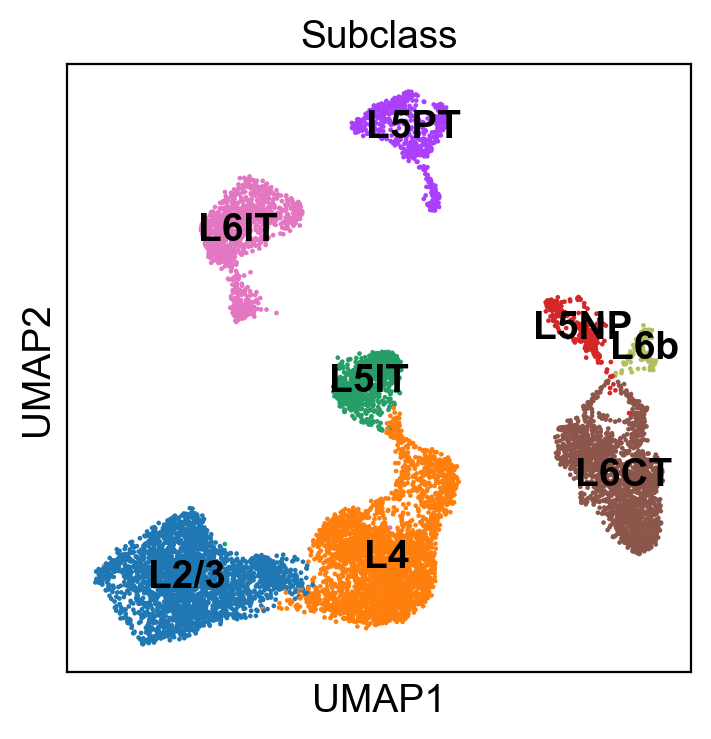

sample  Subclass
P38_1a  L2/3         720
        L4           831
        L5IT         195
        L5NP          97
        L5PT         163
        L6CT         305
        L6IT         243
        L6b           46
P38_2a  L2/3        1023
        L4          1175
        L5IT         263
        L5NP         104
        L5PT         219
        L6CT         779
        L6IT         449
        L6b           41
P38_2b  L2/3         954
        L4          1133
        L5IT         243
        L5NP         110
        L5PT         218
        L6CT         722
        L6IT         400
        L6b           52
dtype: int64

In [2]:
sc.pl.umap(adata["Glut"], color=["Subclass"], legend_loc="on data")
adata["Glut"].obs.groupby(["sample", "Subclass"]).size()

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


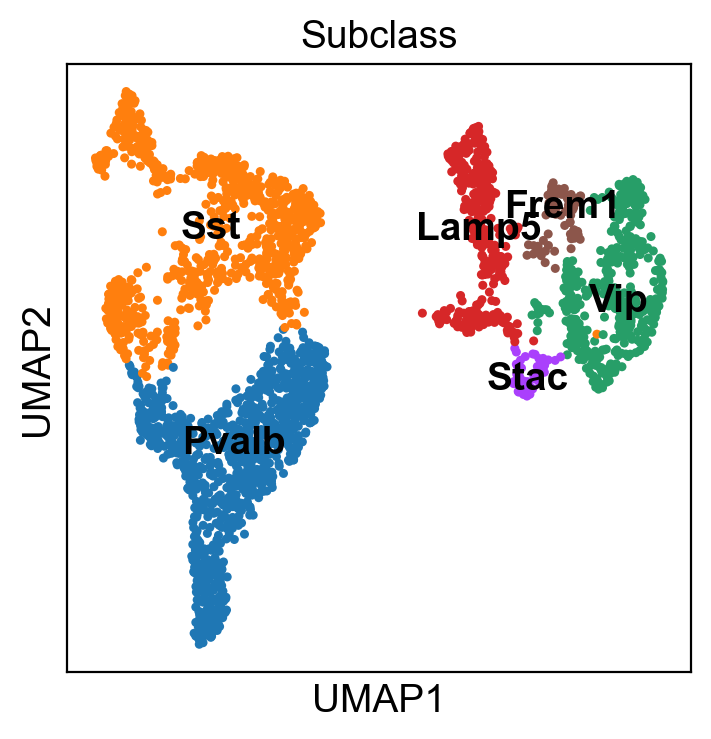

sample  Subclass
P14_1a  Pvalb       275
        Sst         258
        Vip         139
        Lamp5        91
        Stac         23
        Frem1        25
P14_1b  Pvalb       306
        Sst         253
        Vip         137
        Lamp5       105
        Stac         21
        Frem1        25
P14_2a  Pvalb       242
        Sst         161
        Vip         103
        Lamp5        89
        Stac         18
        Frem1        20
P14_2b  Pvalb       194
        Sst         174
        Vip          96
        Lamp5        64
        Stac         11
        Frem1        14
dtype: int64

In [3]:
sc.pl.umap(adata["GABA"], color=["Subclass"], legend_loc="on data")
adata["GABA"].obs.groupby(["sample", "Subclass"]).size()

In [3]:
import pandas as pd
counts_raw = pd.read_csv("E:/Transcriptomics_V1/Mouse/{0}{1}/GSE190940_{0}{1}.csv".format(age, rearing))
counts = counts_raw.copy()
counts.index = np.array(counts_raw["Unnamed: 0"])
counts = counts[counts.columns[1:]]

In [17]:
import anndata as ad
from scipy.sparse import csc_matrix

adatas = []
for classname in ["Glut", "GABA", "Non"]:
    adata_class = adata[classname].copy()
    adata_class.raw = None
    path = "E:/Transcriptomics_V1/Mouse/{0}{1}/filtered_feature_bc_matrix_{2}/".format(age, rearing, classname.lower()) + sample + "/"
    print(adata_class)
    # bcs = [bc.replace("-P8_glut-0-0", "") for bc in temp_adata.obs.index.to_list()]
    bcs = [bc[:29] for bc in adata_class.obs.index.to_list()]
    gns = adata_class.var.index.to_list()
    X = counts.loc[bcs][gns]
    adata_class.X = X
    adatas.append(adata_class)
adata_all = ad.concat(adatas)

AnnData object with n_obs × n_vars = 10485 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'Subclass_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 1619 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'Class_broad', 'sample', 'Subclass', 'Age', 'Type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mean-0', 'std-0', 'highly_variable-1', 'means-1', '

In [18]:
adata_all

AnnData object with n_obs × n_vars = 16997 × 24372
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'Class_broad', 'sample', 'Type', 'Subclass'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [19]:
# Store the counts
adata_all.layers["counts"] = adata_all.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata_all)
# Logarithmize the data
sc.pp.log1p(adata_all)
# Select highly variable genes
sc.pp.highly_variable_genes(adata_all)
# Compute PCA
sc.tl.pca(adata_all)
# Find neighbors
sc.pp.neighbors(adata_all)
# Run UMAP
sc.tl.umap(adata_all)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


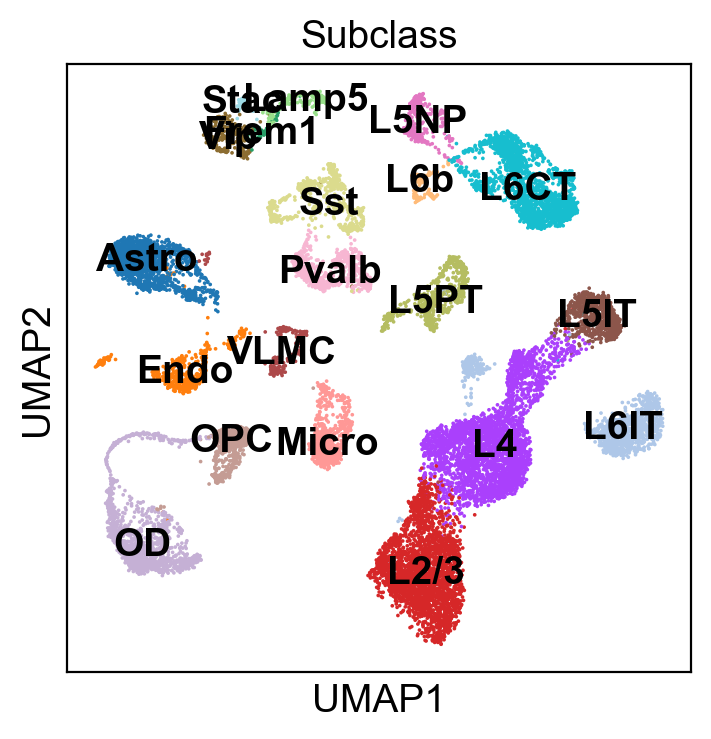

In [20]:
sc.pl.umap(adata_all, color=["Subclass"], legend_loc="on data")

In [21]:
adata_all.write_h5ad("E:/Ryan/GitHub/scGPT-cross/data/Mouse_V1_P38_All.h5ad")